# Instalación de librerías necesarias

In [9]:
!pip install opencv-python numpy matplotlib

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\juanc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Importacion de librerias

In [10]:
import os
import cv2  # Biblioteca principal de OpenCV
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización en Jupyter Notebook

# 1. Cargar la imagen y binarizarla

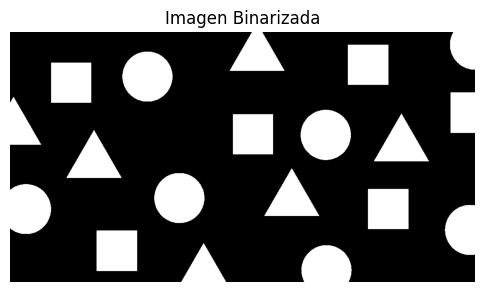

In [3]:
img_color = cv2.imread('Datos/FigGeo.png')  # Imagen original a color
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)  # Convertir a escala de grises
ret, img_bin = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)  # Umbral fijo

# Mostrar imagen binaria
plt.figure(figsize=(6,6))
plt.imshow(img_bin, cmap='gray')
plt.title('Imagen Binarizada')
plt.axis('off')
plt.show()


# 2. Encontrar contornos

In [4]:
contours, hierarchy = cv2.findContours(
    img_bin.copy(),
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)
print(f"Número de contornos detectados: {len(contours)}")

Número de contornos detectados: 19


# 3. Inicializar copia para anotaciones

In [5]:
img_annotated = img_color.copy()
properties = []

# 4. Iterar contornos para calcular propiedades y clasificar

In [6]:
for i, cnt in enumerate(contours):
    # Propiedades básicas
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00']) if M['m00'] else 0
    cy = int(M['m01']/M['m00']) if M['m00'] else 0

    # Aproximación poligonal para contar vértices
    epsilon = 0.02 * perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    vertice_count = len(approx)

    # Clasificación según vértices
    if vertice_count == 3:
        shape_type = 'Triangulo'
    elif vertice_count == 4:
        # Comprobar razón de aspecto para distinguir cuadrado vs rectángulo
        x, y, w, h = cv2.boundingRect(approx)
        aspect_ratio = float(w)/h
        shape_type = 'Cuadrado' if 0.95 <= aspect_ratio <= 1.05 else 'Rectangulo'
    else:
        # Más de 4 vértices se aproxima a círculo
        shape_type = 'Circulo'

    # Almacenar propiedades
    properties.append({
        'id': i,
        'area': area,
        'perimeter': perimeter,
        'centroid': (cx, cy),
        'vertices': vertice_count,
        'shape': shape_type
    })

    # Dibujar contorno y centroide
    cv2.drawContours(img_annotated, [cnt], -1, (0, 255, 0), 2)
    cv2.circle(img_annotated, (cx, cy), 4, (255, 0, 0), -1)
    cv2.putText(
        img_annotated,
        f"{shape_type}",
        (cx - 40, cy - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0, 0, 255),
        2
    )



# 5. Mostrar resultados 

Resumen de clasificación de contornos:
ID 0: Circulo con 6 vértices, Área=7980.5, Perímetro=347.7, Centroide=(723, 533)
ID 1: Triangulo con 3 vértices, Área=4466.5, Perímetro=318.8, Centroide=(442, 541)
ID 2: Cuadrado con 4 vértices, Área=8463.5, Perímetro=367.4, Centroide=(244, 500)
ID 3: Circulo con 6 vértices, Área=6298.5, Perímetro=323.6, Centroide=(1033, 452)
ID 4: Cuadrado con 4 vértices, Área=8372.0, Perímetro=366.0, Centroide=(865, 404)
ID 5: Circulo con 7 vértices, Área=8861.5, Perímetro=358.7, Centroide=(42, 404)
ID 6: Circulo con 8 vértices, Área=10170.0, Perímetro=376.7, Centroide=(387, 379)
ID 7: Triangulo con 3 vértices, Área=6759.5, Perímetro=392.8, Centroide=(644, 383)
ID 8: Triangulo con 3 vértices, Área=6809.5, Perímetro=394.8, Centroide=(191, 296)
ID 9: Cuadrado con 4 vértices, Área=8281.0, Perímetro=364.0, Centroide=(555, 233)
ID 10: Triangulo con 3 vértices, Área=6782.5, Perímetro=392.8, Centroide=(895, 258)
ID 11: Circulo con 8 vértices, Área=10201.5, Perímetro=37

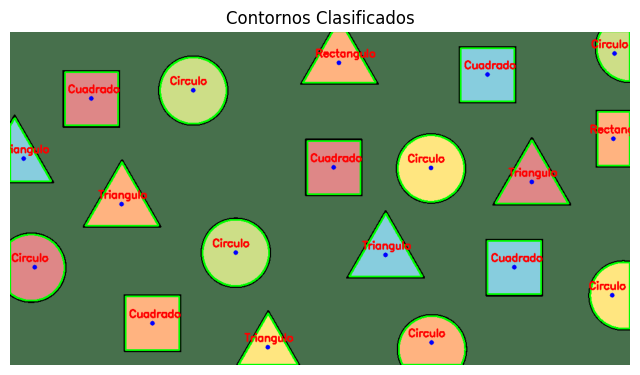

In [7]:
print("Resumen de clasificación de contornos:")
for prop in properties:
    print(
        f"ID {prop['id']}: {prop['shape']} con {prop['vertices']} vértices, "
        f"Área={prop['area']:.1f}, Perímetro={prop['perimeter']:.1f}, "
        f"Centroide={prop['centroid']}"
    )
output_path="Resultado/contornos.png"
img_annotated_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(img_annotated_rgb)
plt.title('Contornos Clasificados')
plt.axis('off')
plt.show()




# 7. Función para guardar imagen final a archivo

In [8]:


def save_final_image(image, output_path):
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    success = cv2.imwrite(output_path, image)
    if success:
        print(f"Imagen guardada en: {output_path}")
    else:
        print(f"Error al guardar imagen en: {output_path}")
    return success

output_path = 'Resultados/solo_contornos.png'
success = save_final_image(img_annotated_rgb, output_path)


Imagen guardada en: Resultados/solo_contornos.png
